In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

In [2]:
dataset_seattle = pd.read_csv('../data/data1/processed/dataset_seattle.csv')

In [3]:
dataset_fairbanks = pd.read_csv('../data/data1/processed/dataset_fairbanks.csv')

In [4]:
dataset_los_angeles = pd.read_csv('../data/data1/processed/dataset_los_angeles.csv')

## Features

In [43]:
dataset_seattle.describe()

,Unnamed: 0,Unnamed: 0.1,Cooling:Electricity [kW](Hourly),Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),...,RefBldgQuickServiceRestaurantNew,RefBldgSecondarySchoolNew,RefBldgSmallHotelNew,RefBldgSmallOfficeNew,RefBldgStand-aloneRetailNew,RefBldgStripMallNew,RefBldgSuperMarketNew,RefBldgWarehouseNew,USA_WA_SEATTLE,month
count,140112.000000,1.401120e+05,140112.000000,140112.000000,140112.000000,140112.000000,140112.000000,140112.000000,140112.000000,140112.000000,...,140112.000000,140112.000000,140112.000000,140112.000000,140112.000000,140112.000000,140112.000000,140112.000000,140112.0,140112.000000
mean,70055.500000,8.403835e+05,37.778688,180.264885,15.771051,103.506153,1.335365,74.133008,53.220947,10.159364,...,0.062521,0.062521,0.062521,0.062521,0.062521,0.062521,0.062521,0.062350,1.0,6.526036
std,40446.994796,4.853633e+05,101.557673,288.659340,25.967284,191.686101,7.787510,169.302260,83.215305,18.416589,...,0.242101,0.242101,0.242101,0.242101,0.242101,0.242101,0.242101,0.241791,0.0,3.446951
min,0.000000,1.560000e+03,0.000000,1.925019,0.000000,0.000000,0.000000,0.000000,1.011600,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000
25%,35027.750000,4.209718e+05,0.000000,23.049338,0.252635,3.021100,0.000000,0.000000,8.092797,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,4.000000
50%,70055.500000,8.403835e+05,0.000000,55.579849,3.659254,26.929976,0.000000,6.447821,20.643869,2.653365,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,7.000000
75%,105083.250000,1.259795e+06,8.984801,193.096680,24.360913,101.032736,0.000000,67.459303,53.238744,9.905768,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,10.000000
max,140111.000000,1.679207e+06,458.047681,1502.776534,156.696697,3150.315818,219.856108,3136.861981,448.566544,91.799800,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,12.000000


In [44]:
dataset_seattle.head(10)

,Unnamed: 0,Unnamed: 0.1,Cooling:Electricity [kW](Hourly),Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Electricity [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),...,RefBldgSecondarySchoolNew,RefBldgSmallHotelNew,RefBldgSmallOfficeNew,RefBldgStand-aloneRetailNew,RefBldgStripMallNew,RefBldgSuperMarketNew,RefBldgWarehouseNew,USA_WA_SEATTLE,month,date
0,0,1560,0.0,01/01 01:00:00,85.494324,0.000000,1.771250,0.0,0.000000,6.812987,...,0,0,0,0,0,1,0,1,1,1900-01-01
1,1,1561,0.0,01/01 02:00:00,84.794544,0.000000,1.771250,0.0,0.000000,6.812987,...,0,0,0,0,0,1,0,1,1,1900-01-01
2,2,1562,0.0,01/01 03:00:00,84.201696,0.000000,2.915564,0.0,0.000000,6.812987,...,0,0,0,0,0,1,0,1,1,1900-01-01
3,3,1563,0.0,01/01 04:00:00,83.726241,0.000000,1.771250,0.0,0.000000,6.812987,...,0,0,0,0,0,1,0,1,1,1900-01-01
4,4,1564,0.0,01/01 05:00:00,89.848974,0.000000,1.771250,0.0,0.000000,6.812987,...,0,0,0,0,0,1,0,1,1,1900-01-01
5,5,1565,0.0,01/01 06:00:00,89.201522,0.000000,2.915543,0.0,0.000000,6.812987,...,0,0,0,0,0,1,0,1,1,1900-01-01
6,6,1566,0.0,01/01 07:00:00,126.340442,24.360913,357.030270,0.0,353.507770,14.149973,...,0,0,0,0,0,1,0,1,1,1900-01-01
7,7,1567,0.0,01/01 08:00:00,138.090475,24.360913,326.329606,0.0,322.807106,14.149973,...,0,0,0,0,0,1,0,1,1,1900-01-01
8,8,1568,0.0,01/01 09:00:00,159.347215,24.360913,289.236468,0.0,284.569591,14.149973,...,0,0,0,0,0,1,0,1,1,1900-01-01
9,9,1569,0.0,01/01 10:00:00,134.335479,24.360913,276.917562,0.0,273.395062,14.149973,...,0,0,0,0,0,1,0,1,1,1900-01-01


In [46]:
dataset_seattle.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Cooling:Electricity [kW](Hourly)',
       'Date/Time', 'Electricity:Facility [kW](Hourly)',
       'Fans:Electricity [kW](Hourly)', 'Gas:Facility [kW](Hourly)',
       'Heating:Electricity [kW](Hourly)', 'Heating:Gas [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)',
       'InteriorEquipment:Gas [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'Water Heater:WaterSystems:Gas [kW](Hourly)', 'building_type',
       'location', 'location_id', 'building_id', 'Date', 'time', 'sunriseTime',
       'sunsetTime', 'temperatureHigh', 'dewPoint', 'humidity', 'windSpeed',
       'cloudCover', 'Electricity:Facility [kW](Hourly)_lag',
       'Electricity:Facility [kW](Hourly)_future',
       'Electricity:Facility_delta_current_lag', 'Christmas Day',
       'Columbus Day', 'Independence Day', 'Labor Day',
       'Martin Luther King Day', 'Memorial Day', 'New Years Day',
       'Presidents Day', 'Thanksgiving', 'Veterans Day

## Seattle

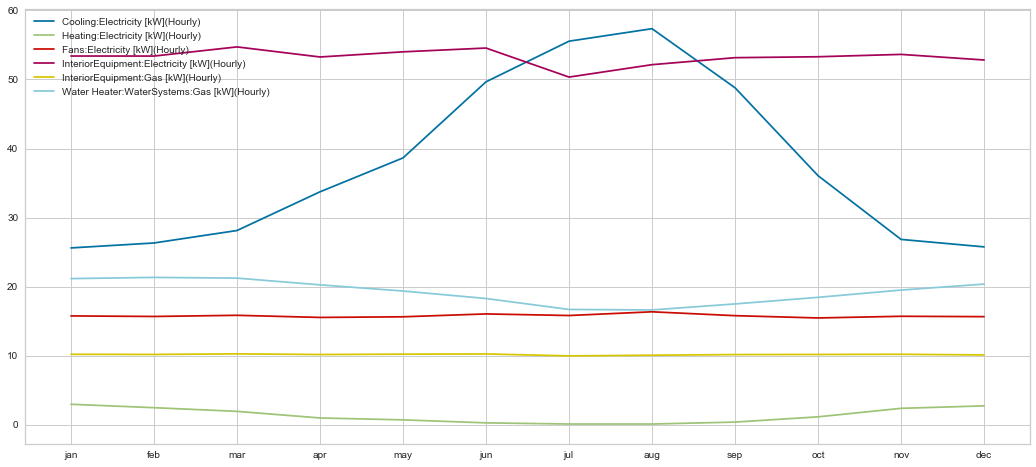

In [38]:
dataset_seattle['date'] = pd.to_datetime(dataset_seattle['Date'], format="%m/%d")
dataset_seattle_1 = dataset_seattle.groupby('date')['Heating:Electricity [kW](Hourly)'].sum().reset_index()
dataset_seattle_1 = dataset_seattle.set_index('date')

y = dataset_seattle_1['Electricity:Facility [kW](Hourly)'].resample('MS').mean()
y2 = dataset_seattle_1['Cooling:Electricity [kW](Hourly)'].resample('MS').mean()
y3 = dataset_seattle_1['Heating:Electricity [kW](Hourly)'].resample('MS').mean()

y4 = dataset_seattle_1['Fans:Electricity [kW](Hourly)'].resample('MS').mean()
y5 = dataset_seattle_1['InteriorEquipment:Electricity [kW](Hourly)'].resample('MS').mean()
y6 = dataset_seattle_1['Gas:Facility [kW](Hourly)'].resample('MS').mean()
y7 = dataset_seattle_1['InteriorEquipment:Gas [kW](Hourly)'].resample('MS').mean()
y8 = dataset_seattle_1['Water Heater:WaterSystems:Gas [kW](Hourly)'].resample('MS').mean()

x = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.plot(x, y2, x, y3, x, y4, x, y5, x, y7, x, y8)
plt.legend([
            'Cooling:Electricity [kW](Hourly)', 
            'Heating:Electricity [kW](Hourly)',
            'Fans:Electricity [kW](Hourly)',
            'InteriorEquipment:Electricity [kW](Hourly)',
            'InteriorEquipment:Gas [kW](Hourly)',
            'Water Heater:WaterSystems:Gas [kW](Hourly)'
           ], loc='upper left')
plt.show()

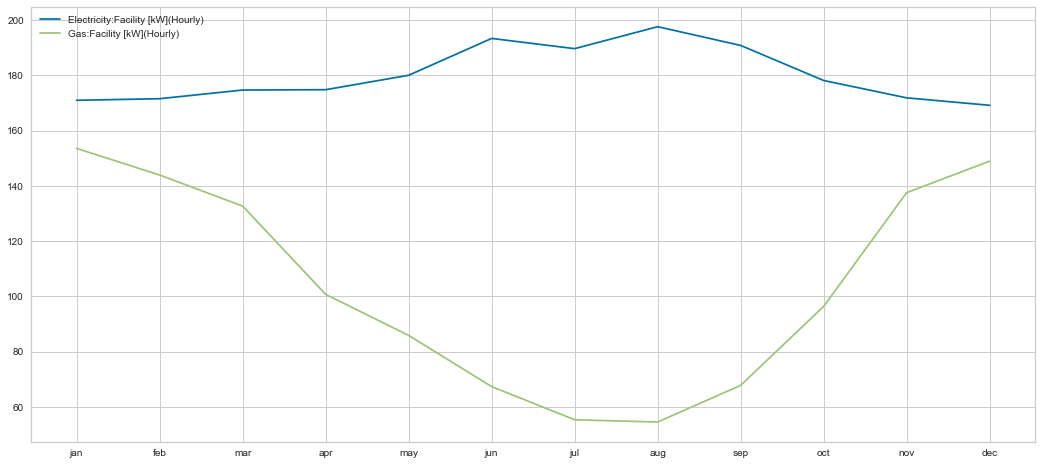

In [39]:
dataset_seattle['date'] = pd.to_datetime(dataset_seattle['Date'], format="%m/%d")
dataset_seattle_1 = dataset_seattle.groupby('date')['Heating:Electricity [kW](Hourly)'].sum().reset_index()
dataset_seattle_1 = dataset_seattle.set_index('date')

y = dataset_seattle_1['Electricity:Facility [kW](Hourly)'].resample('MS').mean()
y6 = dataset_seattle_1['Gas:Facility [kW](Hourly)'].resample('MS').mean()

x = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.plot(x, y, x, y6)
plt.legend(['Electricity:Facility [kW](Hourly)',
            'Gas:Facility [kW](Hourly)'
           ], loc='upper left')
plt.show()

In [ ]:
dataset_seattle['date'] = pd.to_datetime(dataset_seattle['Date'], format="%m/%d")
dataset_seattle_1 = dataset_seattle.set_index('date')

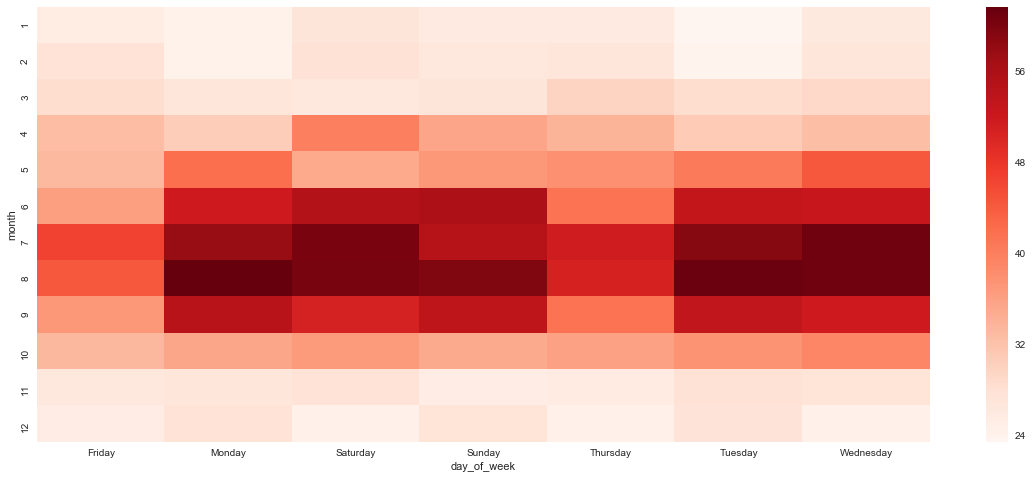

In [27]:
heatmap1_data = pd.pivot_table(dataset_seattle, values='Cooling:Electricity [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

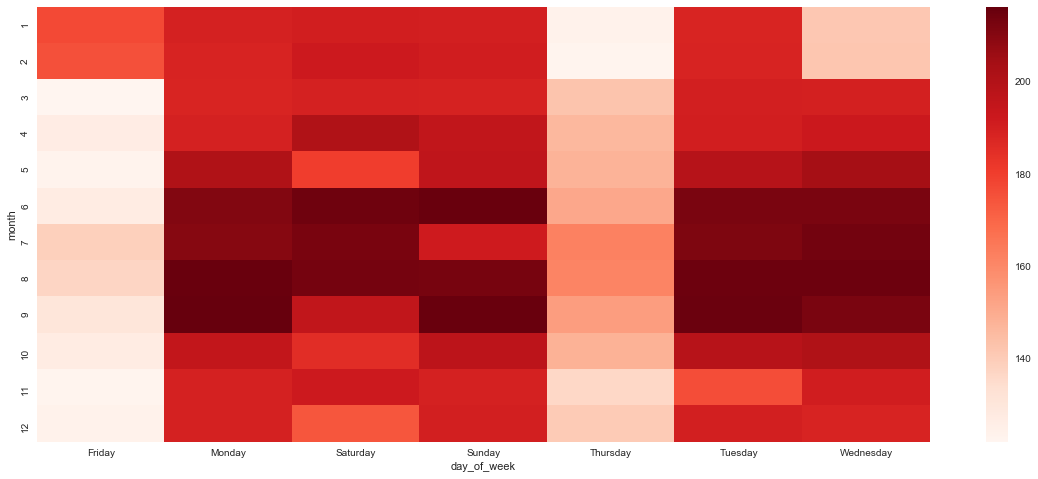

In [32]:
heatmap1_data = pd.pivot_table(dataset_seattle, values='Electricity:Facility [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

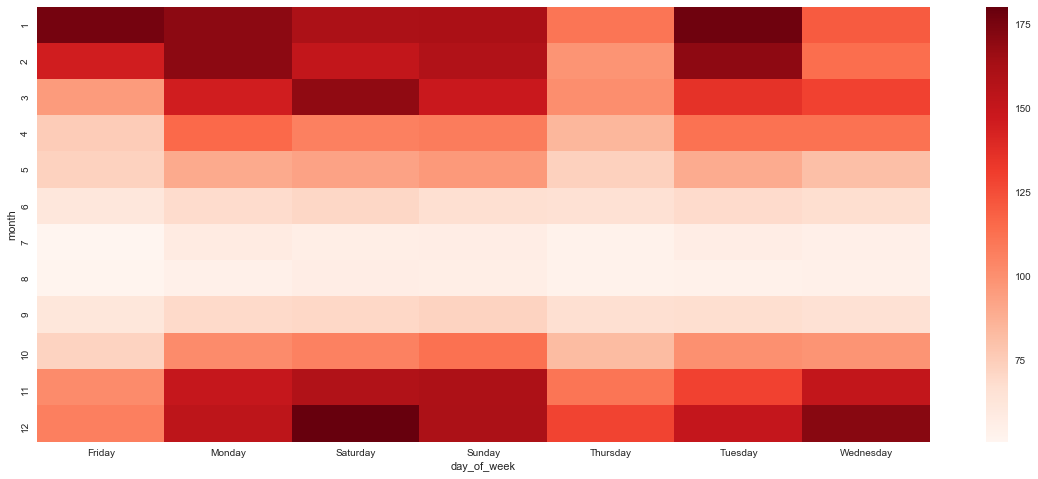

In [14]:
heatmap1_data = pd.pivot_table(dataset_seattle, values='Gas:Facility [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

## Fairbanks

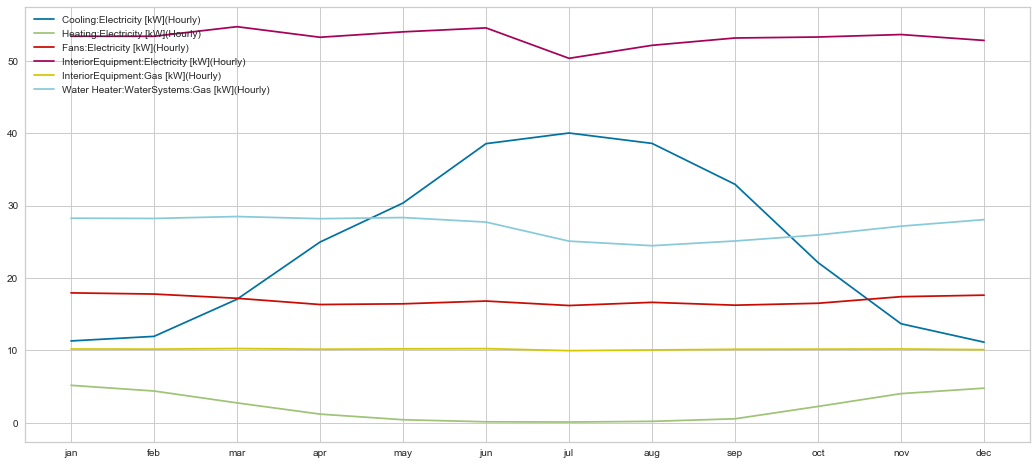

In [36]:
dataset_fairbanks['date'] = pd.to_datetime(dataset_fairbanks['Date'], format="%m/%d")
dataset_fairbanks_1 = dataset_fairbanks.groupby('date')['Heating:Electricity [kW](Hourly)'].sum().reset_index()
dataset_fairbanks_1 = dataset_fairbanks.set_index('date')

y = dataset_fairbanks_1['Electricity:Facility [kW](Hourly)'].resample('MS').mean()
y2 = dataset_fairbanks_1['Cooling:Electricity [kW](Hourly)'].resample('MS').mean()
y3 = dataset_fairbanks_1['Heating:Electricity [kW](Hourly)'].resample('MS').mean()

y4 = dataset_fairbanks_1['Fans:Electricity [kW](Hourly)'].resample('MS').mean()
y5 = dataset_fairbanks_1['InteriorEquipment:Electricity [kW](Hourly)'].resample('MS').mean()
y6 = dataset_fairbanks_1['Gas:Facility [kW](Hourly)'].resample('MS').mean()
y7 = dataset_fairbanks_1['InteriorEquipment:Gas [kW](Hourly)'].resample('MS').mean()
y8 = dataset_fairbanks_1['Water Heater:WaterSystems:Gas [kW](Hourly)'].resample('MS').mean()

x = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.plot(x, y2, x, y3, x, y4, x, y5, x, y7, x, y8)
plt.legend([
            'Cooling:Electricity [kW](Hourly)', 
            'Heating:Electricity [kW](Hourly)',
            'Fans:Electricity [kW](Hourly)',
            'InteriorEquipment:Electricity [kW](Hourly)',
            'InteriorEquipment:Gas [kW](Hourly)',
            'Water Heater:WaterSystems:Gas [kW](Hourly)'
           ], loc='upper left')
plt.show()

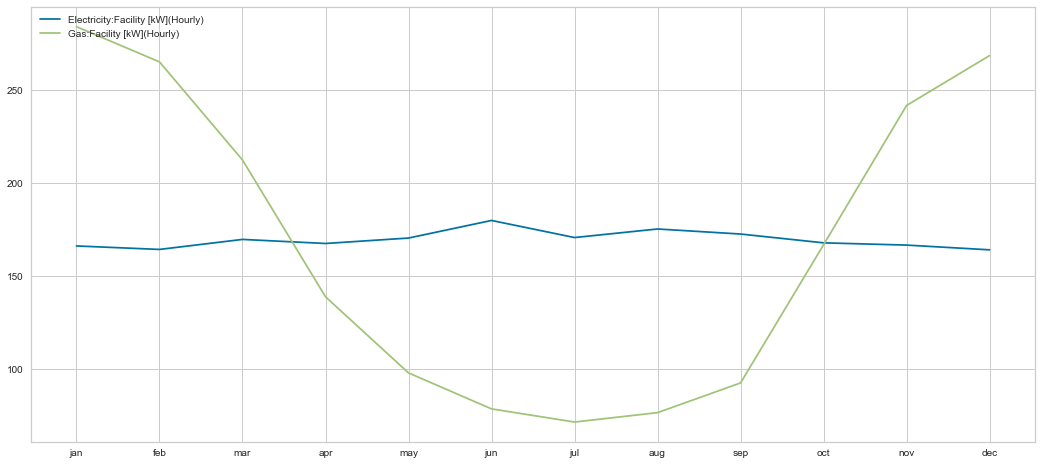

In [37]:
dataset_fairbanks['date'] = pd.to_datetime(dataset_fairbanks['Date'], format="%m/%d")
dataset_fairbanks_1 = dataset_fairbanks.groupby('date')['Heating:Electricity [kW](Hourly)'].sum().reset_index()
dataset_fairbanks_1 = dataset_fairbanks.set_index('date')

y = dataset_fairbanks_1['Electricity:Facility [kW](Hourly)'].resample('MS').mean()
y6 = dataset_fairbanks_1['Gas:Facility [kW](Hourly)'].resample('MS').mean()

x = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.plot(x, y, x, y6)
plt.legend(['Electricity:Facility [kW](Hourly)',
            'Gas:Facility [kW](Hourly)' 
           ], loc='upper left')
plt.show()

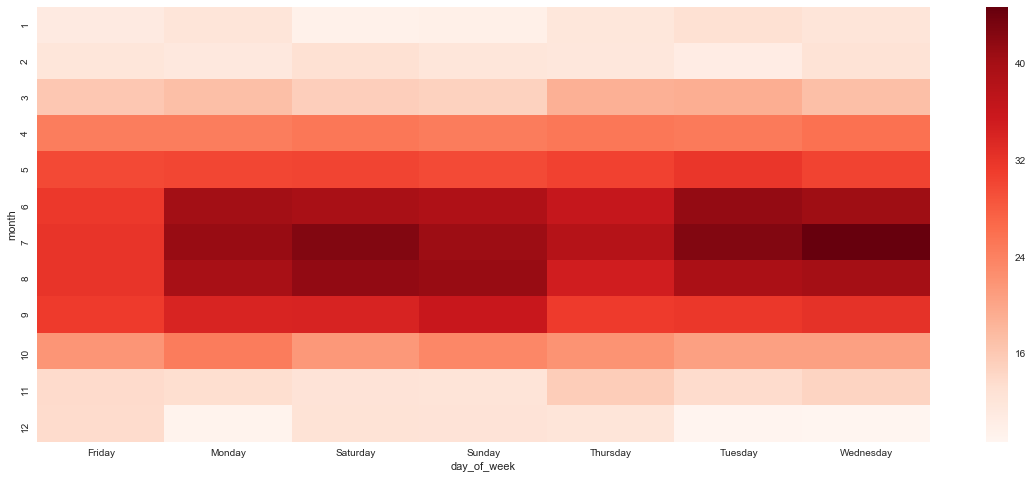

In [17]:
heatmap1_data = pd.pivot_table(dataset_fairbanks, values='Cooling:Electricity [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

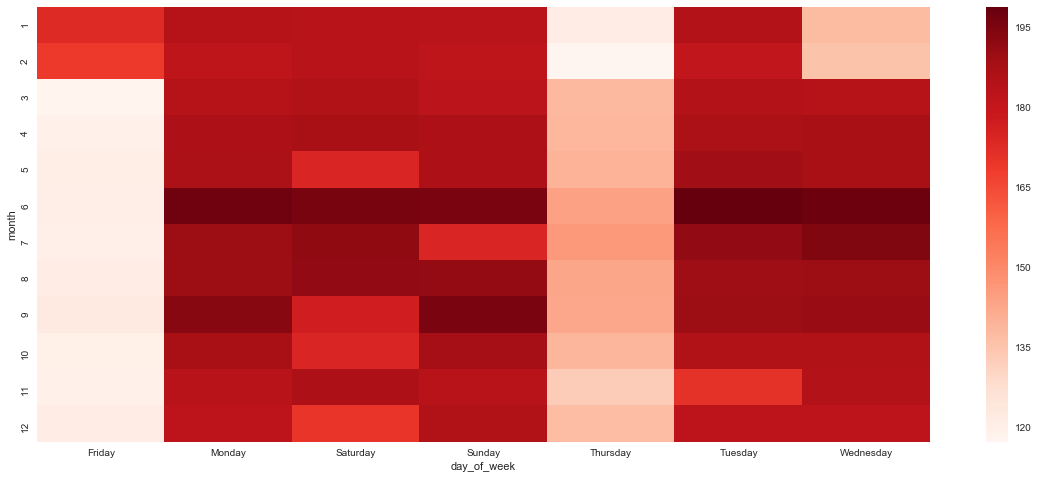

In [18]:
heatmap1_data = pd.pivot_table(dataset_fairbanks, values='Electricity:Facility [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

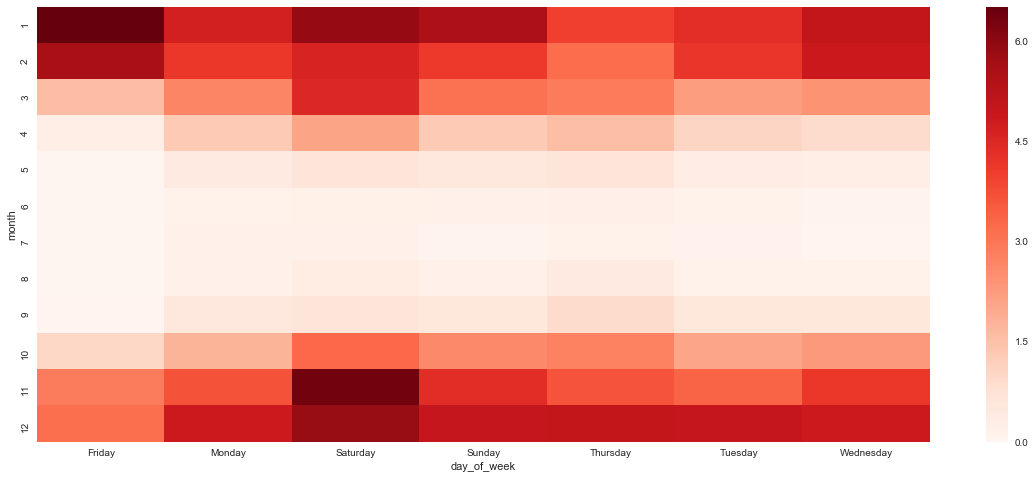

In [19]:
heatmap1_data = pd.pivot_table(dataset_fairbanks, values='Heating:Electricity [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

## Los Angeles

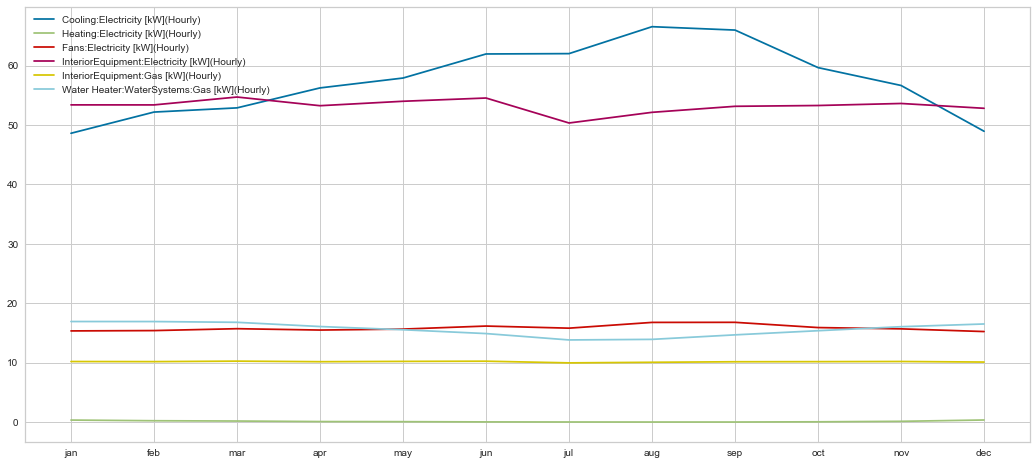

In [40]:
dataset_los_angeles['date'] = pd.to_datetime(dataset_los_angeles['Date'], format="%m/%d")
dataset_los_angeles_1 = dataset_los_angeles.groupby('date')['Heating:Electricity [kW](Hourly)'].sum().reset_index()
dataset_los_angeles_1 = dataset_los_angeles.set_index('date')

y = dataset_los_angeles_1['Electricity:Facility [kW](Hourly)'].resample('MS').mean()
y2 = dataset_los_angeles_1['Cooling:Electricity [kW](Hourly)'].resample('MS').mean()
y3 = dataset_los_angeles_1['Heating:Electricity [kW](Hourly)'].resample('MS').mean()

y4 = dataset_los_angeles_1['Fans:Electricity [kW](Hourly)'].resample('MS').mean()
y5 = dataset_los_angeles_1['InteriorEquipment:Electricity [kW](Hourly)'].resample('MS').mean()
y6 = dataset_los_angeles_1['Gas:Facility [kW](Hourly)'].resample('MS').mean()
y7 = dataset_los_angeles_1['InteriorEquipment:Gas [kW](Hourly)'].resample('MS').mean()
y8 = dataset_los_angeles_1['Water Heater:WaterSystems:Gas [kW](Hourly)'].resample('MS').mean()

x = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.plot(x, y2, x, y3, x, y4, x, y5, x, y7, x, y8)
plt.legend([
            'Cooling:Electricity [kW](Hourly)', 
            'Heating:Electricity [kW](Hourly)',
            'Fans:Electricity [kW](Hourly)',
            'InteriorEquipment:Electricity [kW](Hourly)',
            'InteriorEquipment:Gas [kW](Hourly)',
            'Water Heater:WaterSystems:Gas [kW](Hourly)'
           ], loc='upper left')
plt.show()

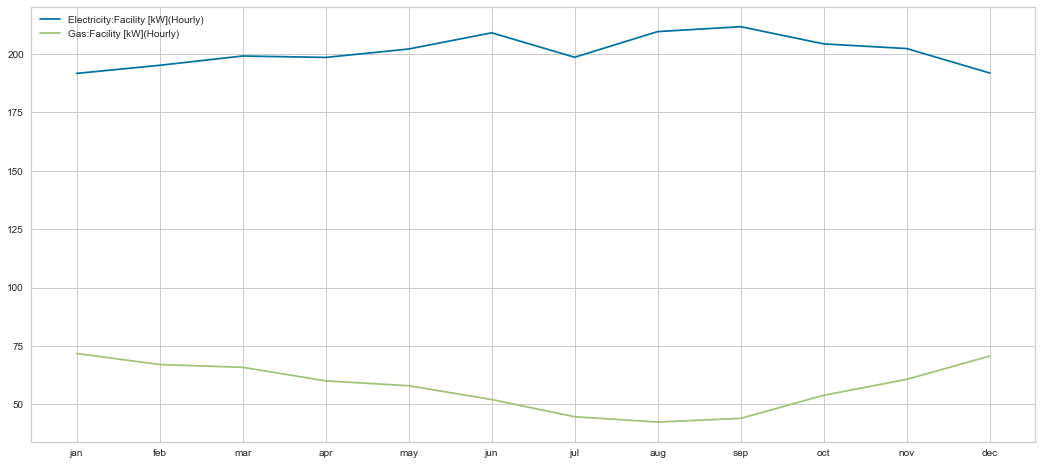

In [41]:
dataset_los_angeles['date'] = pd.to_datetime(dataset_los_angeles['Date'], format="%m/%d")
dataset_los_angeles_1 = dataset_los_angeles.groupby('date')['Heating:Electricity [kW](Hourly)'].sum().reset_index()
dataset_los_angeles_1 = dataset_los_angeles.set_index('date')

y = dataset_los_angeles_1['Electricity:Facility [kW](Hourly)'].resample('MS').mean()
y6 = dataset_los_angeles_1['Gas:Facility [kW](Hourly)'].resample('MS').mean()

x = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
plt.plot(x, y, x, y6)
plt.legend(['Electricity:Facility [kW](Hourly)',
            'Gas:Facility [kW](Hourly)'
           ], loc='upper left')
plt.show()

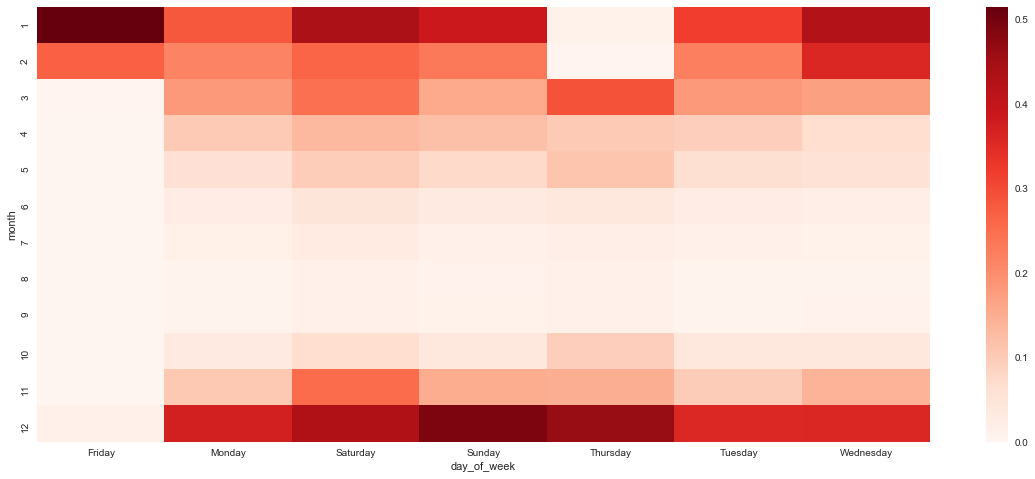

In [22]:
heatmap1_data = pd.pivot_table(dataset_los_angeles, values='Heating:Electricity [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

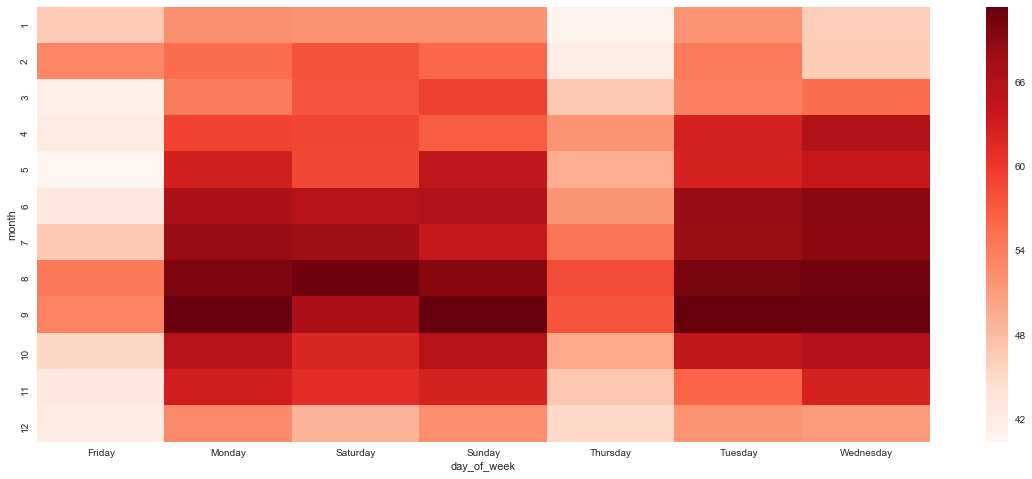

In [23]:
heatmap1_data = pd.pivot_table(dataset_los_angeles, values='Cooling:Electricity [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")

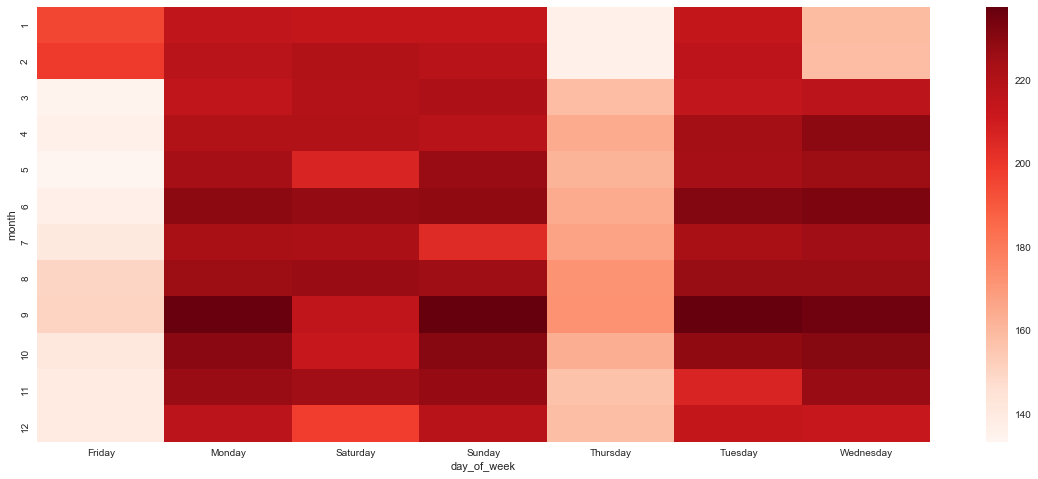

In [24]:
heatmap1_data = pd.pivot_table(dataset_los_angeles, values='Electricity:Facility [kW](Hourly)', 
                     index=['month'], 
                     columns='day_of_week')
plt.figure(figsize=(20, 8))
sns.heatmap(heatmap1_data, cmap="Reds")